#DymPy example

In [1]:
%matplotlib inline
import dympy
import matplotlib.pyplot as plt

In [2]:
dir(dympy)

['Dymola',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'dde',
 'dympy',
 'np',
 'os',
 'scipy',
 'string',
 'win32ui']

In [3]:
# initialize dymola connection
dymola = dympy.Dymola()
dymola.clear()

In [4]:
dymola.openModel('example.mo')

In [5]:
dymola.compile('example')

## Set inputs, parameters and initial conditions

In [6]:
dymola.write_dsu({'time':[0,43200,86400],'Q_flow_hp':[1000,5000,2000],'T_amb':[273.15,278.15,273.15]})
dymola.set_parameters({'C_in.C':5e6,'C_em.C':10e6,'UA_em_in.G':1600,'UA_in_amb.G':200})
dymola.set_parameters({'C_em.T':300})

##Simulate

In [7]:
dymola.simulate(StopTime=86400)

##Return results

In [8]:
res = dymola.get_result()

In [9]:
res.keys()

[u'C_in.port.Q_flow',
 u'prescribedHeatFlow_sol.port.T',
 u'prescribedHeatFlow_hp.port.T',
 u'UA_in_amb.port_b.T',
 u'UA_in_amb.port_b.Q_flow',
 u'UA_in_amb.Q_flow',
 u'prescribedHeatFlow_sol.alpha',
 u'prescribedHeatFlow_sol.T_ref',
 u'C_em.port.Q_flow',
 u'UA_em_in.port_a.T',
 u'prescribedHeatFlow_sol.port.Q_flow',
 u'UA_in_amb.port_a.Q_flow',
 u'prescribedHeatFlow_hp.T_ref',
 u'C_in.port.T',
 u'prescribedTemperature_amb.port.Q_flow',
 u'UA_em_in.port_b.T',
 u'C_em.der_T',
 u'UA_em_in.port_a.Q_flow',
 u'prescribedTemperature_amb.port.T',
 u'C_em.der(T)',
 u'UA_in_amb.dT',
 u'T_amb',
 u'UA_em_in.G',
 u'Q_flow_sol',
 u'C_in.der_T',
 u'prescribedHeatFlow_sol.Q_flow',
 u'C_em.T',
 u'C_em.C',
 u'UA_em_in.Q_flow',
 u'prescribedHeatFlow_hp.alpha',
 u'prescribedHeatFlow_hp.Q_flow',
 u'prescribedTemperature_amb.T',
 u'C_in.C',
 u'UA_in_amb.G',
 u'UA_em_in.dT',
 u'prescribedHeatFlow_hp.port.Q_flow',
 u'UA_em_in.port_b.Q_flow',
 u'C_em.port.T',
 'time',
 u'UA_in_amb.port_a.T',
 u'C_in.der(T)',


In [10]:
dymola.get_res('UA_em_in')

[u'UA_em_in.port_a.T',
 u'UA_em_in.port_b.T',
 u'UA_em_in.port_a.Q_flow',
 u'UA_em_in.G',
 u'UA_em_in.Q_flow',
 u'UA_em_in.dT',
 u'UA_em_in.port_b.Q_flow']

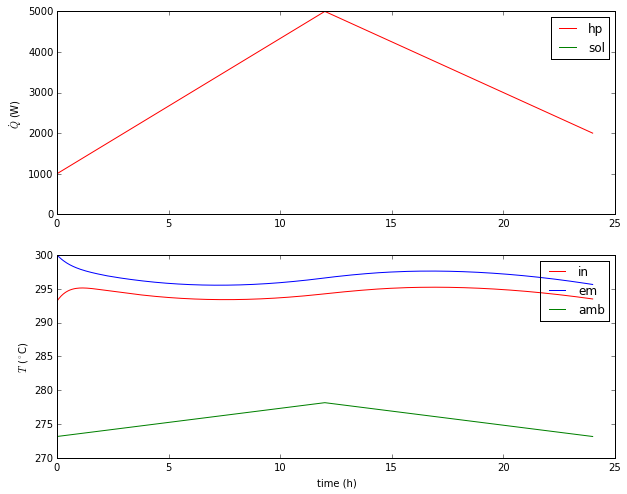

In [11]:
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.plot(res['time']/3600,res['Q_flow_hp'],'r',label='hp')
ax.plot(res['time']/3600,res['Q_flow_sol'],'g',label='sol')
ax.set_ylabel('$\dot{Q}$ (W)')
plt.legend()

ax = plt.subplot(212)
ax.plot(res['time']/3600,res['C_in.T'],'r',label='in')
ax.plot(res['time']/3600,res['C_em.T'],'b',label='em')
ax.plot(res['time']/3600,res['T_amb'],'g',label='amb')
ax.set_ylabel('$T$ ($^\circ$C)')
ax.set_xlabel('time (h)')
plt.legend()

## Use output as new inputs

In [12]:
dymola.dsfinal2dsin()

In [13]:
dymola.simulate(StartTime=86400,StopTime=2*86400)

In [14]:
res2 = dymola.get_result()

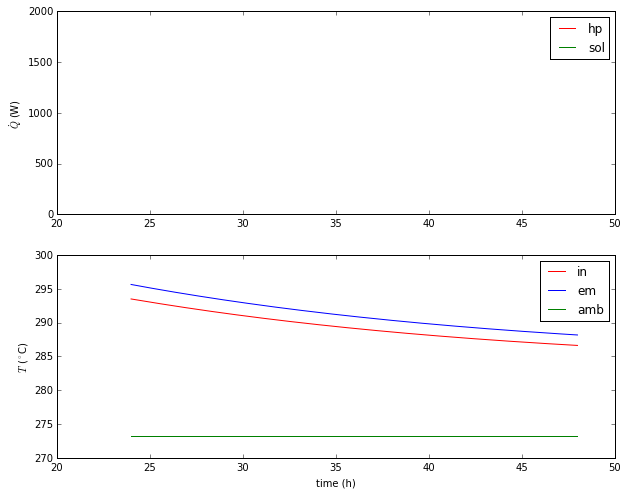

In [15]:
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.plot(res2['time']/3600,res2['Q_flow_hp'],'r',label='hp')
ax.plot(res2['time']/3600,res2['Q_flow_sol'],'g',label='sol')
ax.set_ylabel('$\dot{Q}$ (W)')
plt.legend()

ax = plt.subplot(212)
ax.plot(res2['time']/3600,res2['C_in.T'],'r',label='in')
ax.plot(res2['time']/3600,res2['C_em.T'],'b',label='em')
ax.plot(res2['time']/3600,res2['T_amb'],'g',label='amb')
ax.set_ylabel('$T$ ($^\circ$C)')
ax.set_xlabel('time (h)')
plt.legend()